In [1]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("plotting.mplstyle")
import numpy as np
import sys
sys.path.append("./../code/")
from population_model import massModel,truncatedNormal
from tqdm import tqdm
from scipy.stats import gaussian_kde

cbbh = '#1f78b4'
cnsbh = '#33a02c'
cbns = '#e31a1c'
cmisc = '#6a3d9a'

In [2]:
#nn_data = az.from_netcdf("../data/output_dynamicInjections.cdf")
#inj_data = az.from_netcdf("../data/output_standardInjections.cdf")
nn_data = az.from_netcdf("../data/output_standardInjections_injectionSubsetA.cdf")
inj_data = az.from_netcdf("../data/output_standardInjections_injectionSubsetB.cdf")

In [3]:
nn_samps = nn_data.posterior.stack(draws=("chain", "draw"))
inj_samps = inj_data.posterior.stack(draws=("chain", "draw"))

In [4]:
def plot_contour_data(ax,
                      xvals,
                      yvals,
                      xmin,
                      xmax,
                      ymin,
                      ymax,
                      color,
                      resolution=50,
                      bw='scott'):
    
    kde = gaussian_kde([xvals, yvals],bw_method=0.25)
    xgrid = np.linspace(xmin, xmax, resolution)
    ygrid = np.linspace(ymin, ymax, resolution-1)
    X, Y = np.meshgrid(xgrid, ygrid)
    kde_vals = kde([X.reshape(-1), Y.reshape(-1)])
    kde_vals_2d = kde_vals.reshape(ygrid.size, xgrid.size)

    kde_vals_sorted = np.sort(kde_vals)[::-1]
    cdf_vals = np.cumsum(kde_vals_sorted)
    cdf_vals /= cdf_vals[-1]

    c95 = np.interp(0.95, cdf_vals, kde_vals_sorted)
    c50 = np.interp(0.50, cdf_vals, kde_vals_sorted)
    
    ax.contour(xgrid,ygrid,kde_vals_2d,levels=(c95,c50),colors=color,linewidths=1.5)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/3200260169.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$10^{-1}$","$10^{0}$","$10^{1}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/3200260169.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/3200260169.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/3200260169.py:321: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["$10^{-1}$","$10^{0}$","$10^{1}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/3200260169.py:339: UserWarning: FixedFormatter shou

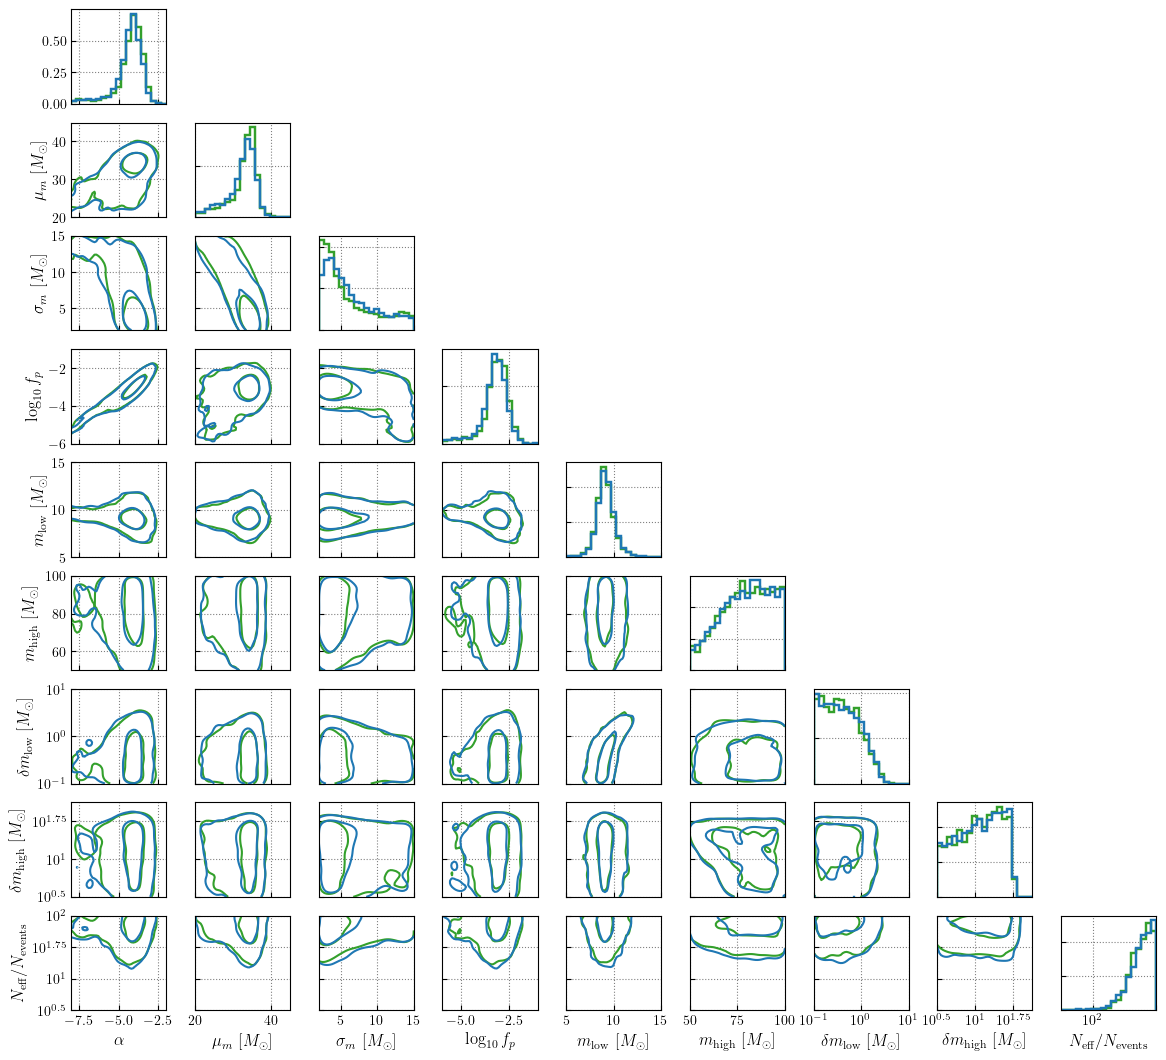

In [ ]:
fig = plt.figure(figsize=(14,13))

alphas_inj = inj_samps.alpha.values
mu_m1s_inj = inj_samps.mu_m1.values
sig_m1s_inj = inj_samps.sig_m1.values
log_f_peaks_inj = inj_samps.log_f_peak.values
mMins_inj = inj_samps.mMin.values
mMaxs_inj = inj_samps.mMax.values
log_dmMins_inj = inj_samps.log_dmMin.values
log_dmMaxs_inj = inj_samps.log_dmMax.values
Neffs_inj = np.log10(inj_samps.nEff_inj_per_event.values)

alphas_nn = nn_samps.alpha.values
mu_m1s_nn = nn_samps.mu_m1.values
sig_m1s_nn = nn_samps.sig_m1.values
log_f_peaks_nn = nn_samps.log_f_peak.values
mMins_nn = nn_samps.mMin.values
mMaxs_nn = nn_samps.mMax.values
log_dmMins_nn = nn_samps.log_dmMin.values
log_dmMaxs_nn = nn_samps.log_dmMax.values
Neffs_nn = np.log10(nn_samps.nEff_inj_per_event.values)

alpha_min,alpha_max = -8,-2
mu_m1_min,mu_m1_max = 20,45
sig_m1_min,sig_m1_max = 2,15
log_f_peak_min,log_f_peak_max = -6,-1
mMin_min,mMin_max = 5,15
mMax_min,mMax_max = 50,100
log_dmMin_min,log_dmMin_max = -1,1
log_dmMax_min,log_dmMax_max = 0.5,1.75
Neff_min,Neff_max = 0.5,2

###########
# COLUMN 1
###########

ax = fig.add_subplot(9,9,1)
ax.hist(alphas_inj,density=True,histtype='step',bins=np.linspace(alpha_min,alpha_max,20),color=cnsbh,lw=1.75)
ax.hist(alphas_nn,density=True,histtype='step',bins=np.linspace(alpha_min,alpha_max,20),color=cbbh,lw=1.75)
ax.set_xlim(alpha_min,alpha_max)
ax.set_xticklabels([])

ax = fig.add_subplot(9,9,10)
plot_contour_data(ax,alphas_inj,mu_m1s_inj,alpha_min,alpha_max,mu_m1_min,mu_m1_max,cnsbh)
plot_contour_data(ax,alphas_nn,mu_m1s_nn,alpha_min,alpha_max,mu_m1_min,mu_m1_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\mu_m$ [$M_\odot$]")

ax = fig.add_subplot(9,9,19)
plot_contour_data(ax,alphas_inj,sig_m1s_inj,alpha_min,alpha_max,sig_m1_min,sig_m1_max,cnsbh)
plot_contour_data(ax,alphas_nn,sig_m1s_nn,alpha_min,alpha_max,sig_m1_min,sig_m1_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\sigma_m$ [$M_\odot$]")

ax = fig.add_subplot(9,9,28)
plot_contour_data(ax,alphas_inj,log_f_peaks_inj,alpha_min,alpha_max,log_f_peak_min,log_f_peak_max,cnsbh)
plot_contour_data(ax,alphas_nn,log_f_peaks_nn,alpha_min,alpha_max,log_f_peak_min,log_f_peak_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\log_{10} f_p$")

ax = fig.add_subplot(9,9,37)
plot_contour_data(ax,alphas_inj,mMins_inj,alpha_min,alpha_max,mMin_min,mMin_max,cnsbh)
plot_contour_data(ax,alphas_nn,mMins_nn,alpha_min,alpha_max,mMin_min,mMin_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$m_\mathrm{low}$ [$M_\odot$]")

ax = fig.add_subplot(9,9,46)
plot_contour_data(ax,alphas_inj,mMaxs_inj,alpha_min,alpha_max,mMax_min,mMax_max,cnsbh)
plot_contour_data(ax,alphas_nn,mMaxs_nn,alpha_min,alpha_max,mMax_min,mMax_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$m_\mathrm{high}$ [$M_\odot$]")

ax = fig.add_subplot(9,9,55)
plot_contour_data(ax,alphas_inj,log_dmMins_inj,alpha_min,alpha_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,alphas_nn,log_dmMins_nn,alpha_min,alpha_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels(["$10^{-1}$","$10^{0}$","$10^{1}$"])
ax.set_ylabel(r"$\delta m_\mathrm{low}$ [$M_\odot$]")

ax = fig.add_subplot(9,9,64)
plot_contour_data(ax,alphas_inj,log_dmMaxs_inj,alpha_min,alpha_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,alphas_nn,log_dmMaxs_nn,alpha_min,alpha_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$"])
ax.set_ylabel(r"$\delta m_\mathrm{high}$ [$M_\odot$]")

ax = fig.add_subplot(9,9,73)
plot_contour_data(ax,alphas_inj,Neffs_inj,alpha_min,alpha_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,alphas_nn,Neffs_nn,alpha_min,alpha_max,Neff_min,Neff_max,cbbh)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")
ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
#ax.set_ylabel(r"$\delta m_\mathrm{high}$ [$M_\odot$]")

###########
# COLUMN 2
###########

ax = fig.add_subplot(9,9,11)
ax.hist(mu_m1s_inj,density=True,histtype='step',bins=np.linspace(mu_m1_min,mu_m1_max,20),color=cnsbh,lw=1.75)
ax.hist(mu_m1s_nn,density=True,histtype='step',bins=np.linspace(mu_m1_min,mu_m1_max,20),color=cbbh,lw=1.75)
ax.set_xlim(mu_m1_min,mu_m1_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,20)
plot_contour_data(ax,mu_m1s_inj,sig_m1s_inj,mu_m1_min,mu_m1_max,sig_m1_min,sig_m1_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,sig_m1s_nn,mu_m1_min,mu_m1_max,sig_m1_min,sig_m1_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,29)
plot_contour_data(ax,mu_m1s_inj,log_f_peaks_inj,mu_m1_min,mu_m1_max,log_f_peak_min,log_f_peak_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,log_f_peaks_nn,mu_m1_min,mu_m1_max,log_f_peak_min,log_f_peak_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,38)
plot_contour_data(ax,mu_m1s_inj,mMins_inj,mu_m1_min,mu_m1_max,mMin_min,mMin_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,mMins_nn,mu_m1_min,mu_m1_max,mMin_min,mMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,47)
plot_contour_data(ax,mu_m1s_inj,mMaxs_inj,mu_m1_min,mu_m1_max,mMax_min,mMax_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,mMaxs_nn,mu_m1_min,mu_m1_max,mMax_min,mMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,56)
plot_contour_data(ax,mu_m1s_inj,log_dmMins_inj,mu_m1_min,mu_m1_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,log_dmMins_nn,mu_m1_min,mu_m1_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,65)
plot_contour_data(ax,mu_m1s_inj,log_dmMaxs_inj,mu_m1_min,mu_m1_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,log_dmMaxs_nn,mu_m1_min,mu_m1_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,74)
plot_contour_data(ax,mu_m1s_inj,Neffs_inj,mu_m1_min,mu_m1_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,mu_m1s_nn,Neffs_nn,mu_m1_min,mu_m1_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\mu_m$ [$M_\odot$]")

###########
# COLUMN 3
###########

ax = fig.add_subplot(9,9,21)
ax.hist(sig_m1s_inj,density=True,histtype='step',bins=np.linspace(sig_m1_min,sig_m1_max,20),color=cnsbh,lw=1.75)
ax.hist(sig_m1s_nn,density=True,histtype='step',bins=np.linspace(sig_m1_min,sig_m1_max,20),color=cbbh,lw=1.75)
ax.set_xlim(sig_m1_min,sig_m1_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,30)
plot_contour_data(ax,sig_m1s_inj,log_f_peaks_inj,sig_m1_min,sig_m1_max,log_f_peak_min,log_f_peak_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,log_f_peaks_nn,sig_m1_min,sig_m1_max,log_f_peak_min,log_f_peak_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,39)
plot_contour_data(ax,sig_m1s_inj,mMins_inj,sig_m1_min,sig_m1_max,mMin_min,mMin_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,mMins_nn,sig_m1_min,sig_m1_max,mMin_min,mMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,48)
plot_contour_data(ax,sig_m1s_inj,mMaxs_inj,sig_m1_min,sig_m1_max,mMax_min,mMax_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,mMaxs_nn,sig_m1_min,sig_m1_max,mMax_min,mMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,57)
plot_contour_data(ax,sig_m1s_inj,log_dmMins_inj,sig_m1_min,sig_m1_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,log_dmMins_nn,sig_m1_min,sig_m1_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,66)
plot_contour_data(ax,sig_m1s_inj,log_dmMaxs_inj,sig_m1_min,sig_m1_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,log_dmMaxs_nn,sig_m1_min,sig_m1_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,75)
plot_contour_data(ax,sig_m1s_inj,Neffs_inj,sig_m1_min,sig_m1_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,sig_m1s_nn,Neffs_nn,sig_m1_min,sig_m1_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\sigma_m$ [$M_\odot$]")

###########
# COLUMN 4
###########

ax = fig.add_subplot(9,9,31)
ax.hist(log_f_peaks_inj,density=True,histtype='step',bins=np.linspace(log_f_peak_min,log_f_peak_max,20),color=cnsbh,lw=1.75)
ax.hist(log_f_peaks_nn,density=True,histtype='step',bins=np.linspace(log_f_peak_min,log_f_peak_max,20),color=cbbh,lw=1.75)
ax.set_xlim(log_f_peak_min,log_f_peak_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,40)
plot_contour_data(ax,log_f_peaks_inj,mMins_inj,log_f_peak_min,log_f_peak_max,mMin_min,mMin_max,cnsbh)
plot_contour_data(ax,log_f_peaks_nn,mMins_nn,log_f_peak_min,log_f_peak_max,mMin_min,mMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,49)
plot_contour_data(ax,log_f_peaks_inj,mMaxs_inj,log_f_peak_min,log_f_peak_max,mMax_min,mMax_max,cnsbh)
plot_contour_data(ax,log_f_peaks_nn,mMaxs_nn,log_f_peak_min,log_f_peak_max,mMax_min,mMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,58)
plot_contour_data(ax,log_f_peaks_inj,log_dmMins_inj,log_f_peak_min,log_f_peak_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,log_f_peaks_nn,log_dmMins_nn,log_f_peak_min,log_f_peak_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,67)
plot_contour_data(ax,log_f_peaks_inj,log_dmMaxs_inj,log_f_peak_min,log_f_peak_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,log_f_peaks_nn,log_dmMaxs_nn,log_f_peak_min,log_f_peak_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,76)
plot_contour_data(ax,log_f_peaks_inj,Neffs_inj,log_f_peak_min,log_f_peak_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,log_f_peaks_nn,Neffs_nn,log_f_peak_min,log_f_peak_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\log_{10} f_p$")

###########
# COLUMN 5
###########

ax = fig.add_subplot(9,9,41)
ax.hist(mMins_inj,density=True,histtype='step',bins=np.linspace(mMin_min,mMin_max,20),color=cnsbh,lw=1.75)
ax.hist(mMins_nn,density=True,histtype='step',bins=np.linspace(mMin_min,mMin_max,20),color=cbbh,lw=1.75)
ax.set_xlim(mMin_min,mMin_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,50)
plot_contour_data(ax,mMins_inj,mMaxs_inj,mMin_min,mMin_max,mMax_min,mMax_max,cnsbh)
plot_contour_data(ax,mMins_nn,mMaxs_nn,mMin_min,mMin_max,mMax_min,mMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,59)
plot_contour_data(ax,mMins_inj,log_dmMins_inj,mMin_min,mMin_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,mMins_nn,log_dmMins_nn,mMin_min,mMin_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,68)
plot_contour_data(ax,mMins_inj,log_dmMaxs_inj,mMin_min,mMin_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,mMins_nn,log_dmMaxs_nn,mMin_min,mMin_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,77)
plot_contour_data(ax,mMins_inj,Neffs_inj,mMin_min,mMin_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,mMins_nn,Neffs_nn,mMin_min,mMin_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$m_\mathrm{low}$ [$M_\odot$]")

###########
# COLUMN 6
###########

ax = fig.add_subplot(9,9,51)
ax.hist(mMaxs_inj,density=True,histtype='step',bins=np.linspace(mMax_min,mMax_max,20),color=cnsbh,lw=1.75)
ax.hist(mMaxs_nn,density=True,histtype='step',bins=np.linspace(mMax_min,mMax_max,20),color=cbbh,lw=1.75)
ax.set_xlim(mMax_min,mMax_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,60)
plot_contour_data(ax,mMaxs_inj,log_dmMins_inj,mMax_min,mMax_max,log_dmMin_min,log_dmMin_max,cnsbh)
plot_contour_data(ax,mMaxs_nn,log_dmMins_nn,mMax_min,mMax_max,log_dmMin_min,log_dmMin_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,69)
plot_contour_data(ax,mMaxs_inj,log_dmMaxs_inj,mMax_min,mMax_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,mMaxs_nn,log_dmMaxs_nn,mMax_min,mMax_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,78)
plot_contour_data(ax,mMaxs_inj,Neffs_inj,mMax_min,mMax_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,mMaxs_nn,Neffs_nn,mMax_min,mMax_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$m_\mathrm{high}$ [$M_\odot$]")

###########
# COLUMN 7
###########

ax = fig.add_subplot(9,9,61)
ax.hist(log_dmMins_inj,density=True,histtype='step',bins=np.linspace(log_dmMin_min,log_dmMin_max,20),color=cnsbh,lw=1.75)
ax.hist(log_dmMins_nn,density=True,histtype='step',bins=np.linspace(log_dmMin_min,log_dmMin_max,20),color=cbbh,lw=1.75)
ax.set_xlim(log_dmMin_min,log_dmMin_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,70)
plot_contour_data(ax,log_dmMins_inj,log_dmMaxs_inj,log_dmMin_min,log_dmMin_max,log_dmMax_min,log_dmMax_max,cnsbh)
plot_contour_data(ax,log_dmMins_nn,log_dmMaxs_nn,log_dmMin_min,log_dmMin_max,log_dmMax_min,log_dmMax_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,79)
plot_contour_data(ax,log_dmMins_inj,Neffs_inj,log_dmMin_min,log_dmMin_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,log_dmMins_nn,Neffs_nn,log_dmMin_min,log_dmMin_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xticklabels(["$10^{-1}$","$10^{0}$","$10^{1}$"])
ax.set_xlabel(r"$\delta m_\mathrm{low}$ [$M_\odot$]")

###########
# COLUMN 8
###########

ax = fig.add_subplot(9,9,71)
ax.hist(log_dmMaxs_inj,density=True,histtype='step',bins=np.linspace(log_dmMax_min,log_dmMax_max,20),color=cnsbh,lw=1.75)
ax.hist(log_dmMaxs_nn,density=True,histtype='step',bins=np.linspace(log_dmMax_min,log_dmMax_max,20),color=cbbh,lw=1.75)
ax.set_xlim(log_dmMax_min,log_dmMax_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(9,9,80)
plot_contour_data(ax,log_dmMaxs_inj,Neffs_inj,log_dmMax_min,log_dmMax_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,log_dmMaxs_nn,Neffs_nn,log_dmMax_min,log_dmMax_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$"])
ax.set_xlabel(r"$\delta m_\mathrm{high}$ [$M_\odot$]")

###########
# COLUMN 9
###########

ax = fig.add_subplot(9,9,81)
ax.hist(Neffs_inj,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cnsbh,lw=1.75)
ax.hist(Neffs_nn,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cbbh,lw=1.75)
ax.set_xlim(Neff_min,Neff_max)
ax.set_yticklabels([])
ax.set_xticklabels(["$10$","$10^{2}$"])
ax.set_xlabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")


plt.subplots_adjust(wspace=0.3,hspace=0.2)
plt.savefig('figure_10.pdf',bbox_inches='tight',dpi=400)
plt.show()

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/2719214492.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/2719214492.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["$10$","$10^{2}$"])


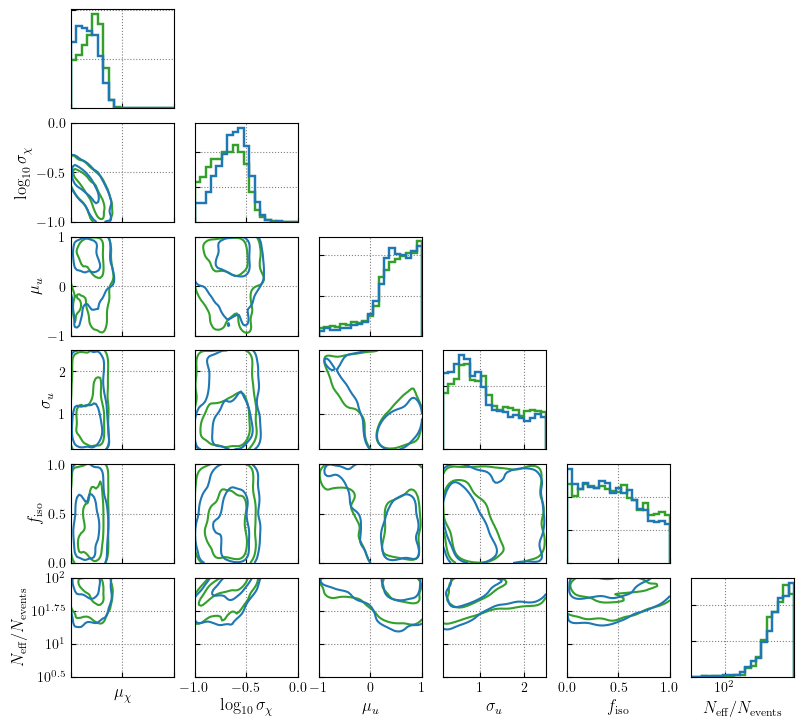

In [6]:
fig = plt.figure(figsize=(14*(6./9.),13*(6./9.)))

bqs_inj = inj_samps.bq.values
mu_chis_inj = inj_samps.mu_chi.values
logsig_chis_inj = inj_samps.logsig_chi.values
mu_costs_inj = inj_samps.mu_cost.values
sig_costs_inj = inj_samps.sig_cost.values
f_isos_inj = inj_samps.f_iso.values
Neffs_inj = np.log10(inj_samps.nEff_inj_per_event.values)

bqs_nn = nn_samps.bq.values
mu_chis_nn = nn_samps.mu_chi.values
logsig_chis_nn = nn_samps.logsig_chi.values
mu_costs_nn = nn_samps.mu_cost.values
sig_costs_nn = nn_samps.sig_cost.values
f_isos_nn = nn_samps.f_iso.values
Neffs_nn = np.log10(nn_samps.nEff_inj_per_event.values)

bq_min,bq_max = -2,6
mu_chi_min,mu_chi_max = 0,1
logsig_chi_min,logsig_chi_max = -1,0
mu_cost_min,mu_cost_max = -1,1
sig_cost_min,sig_cost_max = 0.15,2.5
f_iso_min,f_iso_max = 0,1
Neff_min,Neff_max = 0.5,2

###########
# COLUMN 1
###########

ax = fig.add_subplot(6,6,1)
ax.hist(mu_chis_inj,density=True,histtype='step',bins=np.linspace(mu_chi_min,mu_chi_max,20),color=cnsbh,lw=1.75)
ax.hist(mu_chis_nn,density=True,histtype='step',bins=np.linspace(mu_chi_min,mu_chi_max,20),color=cbbh,lw=1.75)
ax.set_xlim(mu_chi_min,mu_chi_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,7)
plot_contour_data(ax,mu_chis_inj,logsig_chis_inj,mu_chi_min,mu_chi_max,logsig_chi_min,logsig_chi_max,cnsbh)
plot_contour_data(ax,mu_chis_nn,logsig_chis_nn,mu_chi_min,mu_chi_max,logsig_chi_min,logsig_chi_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\log_{10}\sigma_\chi$")

ax = fig.add_subplot(6,6,13)
plot_contour_data(ax,mu_chis_inj,mu_costs_inj,mu_chi_min,mu_chi_max,mu_cost_min,mu_cost_max,cnsbh)
plot_contour_data(ax,mu_chis_nn,mu_costs_nn,mu_chi_min,mu_chi_max,mu_cost_min,mu_cost_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\mu_u$")

ax = fig.add_subplot(6,6,19)
plot_contour_data(ax,mu_chis_inj,sig_costs_inj,mu_chi_min,mu_chi_max,sig_cost_min,sig_cost_max,cnsbh)
plot_contour_data(ax,mu_chis_nn,sig_costs_nn,mu_chi_min,mu_chi_max,sig_cost_min,sig_cost_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\sigma_u$")

ax = fig.add_subplot(6,6,25)
plot_contour_data(ax,mu_chis_inj,f_isos_inj,mu_chi_min,mu_chi_max,f_iso_min,f_iso_max,cnsbh)
plot_contour_data(ax,mu_chis_nn,f_isos_nn,mu_chi_min,mu_chi_max,f_iso_min,f_iso_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$f_\mathrm{iso}$")

ax = fig.add_subplot(6,6,31)
plot_contour_data(ax,mu_chis_inj,Neffs_inj,mu_chi_min,mu_chi_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,mu_chis_nn,Neffs_nn,mu_chi_min,mu_chi_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\mu_\chi$")
ax.set_xticklabels([])
ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
ax.set_ylabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")

###########
# COLUMN 2
###########

ax = fig.add_subplot(6,6,8)
ax.hist(logsig_chis_inj,density=True,histtype='step',bins=np.linspace(logsig_chi_min,logsig_chi_max,20),color=cnsbh,lw=1.75)
ax.hist(logsig_chis_nn,density=True,histtype='step',bins=np.linspace(logsig_chi_min,logsig_chi_max,20),color=cbbh,lw=1.75)
ax.set_xlim(logsig_chi_min,logsig_chi_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,14)
plot_contour_data(ax,logsig_chis_inj,mu_costs_inj,logsig_chi_min,logsig_chi_max,mu_cost_min,mu_cost_max,cnsbh)
plot_contour_data(ax,logsig_chis_nn,mu_costs_nn,logsig_chi_min,logsig_chi_max,mu_cost_min,mu_cost_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,20)
plot_contour_data(ax,logsig_chis_inj,sig_costs_inj,logsig_chi_min,logsig_chi_max,sig_cost_min,sig_cost_max,cnsbh)
plot_contour_data(ax,logsig_chis_nn,sig_costs_nn,logsig_chi_min,logsig_chi_max,sig_cost_min,sig_cost_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,26)
plot_contour_data(ax,logsig_chis_inj,f_isos_inj,logsig_chi_min,logsig_chi_max,f_iso_min,f_iso_max,cnsbh)
plot_contour_data(ax,logsig_chis_nn,f_isos_nn,logsig_chi_min,logsig_chi_max,f_iso_min,f_iso_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,32)
plot_contour_data(ax,logsig_chis_inj,Neffs_inj,logsig_chi_min,logsig_chi_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,logsig_chis_nn,Neffs_nn,logsig_chi_min,logsig_chi_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\log_{10}\sigma_\chi$")

###########
# COLUMN 3
###########

ax = fig.add_subplot(6,6,15)
ax.hist(mu_costs_inj,density=True,histtype='step',bins=np.linspace(mu_cost_min,mu_cost_max,20),color=cnsbh,lw=1.75)
ax.hist(mu_costs_nn,density=True,histtype='step',bins=np.linspace(mu_cost_min,mu_cost_max,20),color=cbbh,lw=1.75)
ax.set_xlim(mu_cost_min,mu_cost_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,21)
plot_contour_data(ax,mu_costs_inj,sig_costs_inj,mu_cost_min,mu_cost_max,sig_cost_min,sig_cost_max,cnsbh)
plot_contour_data(ax,mu_costs_nn,sig_costs_nn,mu_cost_min,mu_cost_max,sig_cost_min,sig_cost_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,27)
plot_contour_data(ax,mu_costs_inj,f_isos_inj,mu_cost_min,mu_cost_max,f_iso_min,f_iso_max,cnsbh)
plot_contour_data(ax,mu_costs_nn,f_isos_nn,mu_cost_min,mu_cost_max,f_iso_min,f_iso_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,33)
plot_contour_data(ax,mu_costs_inj,Neffs_inj,mu_cost_min,mu_cost_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,mu_costs_nn,Neffs_nn,mu_cost_min,mu_cost_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\mu_u$")

###########
# COLUMN 4
###########

ax = fig.add_subplot(6,6,22)
ax.hist(sig_costs_inj,density=True,histtype='step',bins=np.linspace(sig_cost_min,sig_cost_max,20),color=cnsbh,lw=1.75)
ax.hist(sig_costs_nn,density=True,histtype='step',bins=np.linspace(sig_cost_min,sig_cost_max,20),color=cbbh,lw=1.75)
ax.set_xlim(sig_cost_min,sig_cost_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,28)
plot_contour_data(ax,sig_costs_inj,f_isos_inj,sig_cost_min,sig_cost_max,f_iso_min,f_iso_max,cnsbh)
plot_contour_data(ax,sig_costs_nn,f_isos_nn,sig_cost_min,sig_cost_max,f_iso_min,f_iso_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,34)
plot_contour_data(ax,sig_costs_inj,Neffs_inj,sig_cost_min,sig_cost_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,sig_costs_nn,Neffs_nn,sig_cost_min,sig_cost_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\sigma_u$")

###########
# COLUMN 5
###########

ax = fig.add_subplot(6,6,29)
ax.hist(f_isos_inj,density=True,histtype='step',bins=np.linspace(f_iso_min,f_iso_max,20),color=cnsbh,lw=1.75)
ax.hist(f_isos_nn,density=True,histtype='step',bins=np.linspace(f_iso_min,f_iso_max,20),color=cbbh,lw=1.75)
ax.set_xlim(f_iso_min,f_iso_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(6,6,35)
plot_contour_data(ax,f_isos_inj,Neffs_inj,f_iso_min,f_iso_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,f_isos_nn,Neffs_nn,f_iso_min,f_iso_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$f_\mathrm{iso}$")

###########
# COLUMN 6
###########

ax = fig.add_subplot(6,6,36)
ax.hist(Neffs_inj,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cnsbh,lw=1.75)
ax.hist(Neffs_nn,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cbbh,lw=1.75)
ax.set_xlim(Neff_min,Neff_max)
ax.set_yticklabels([])
ax.set_xticklabels(["$10$","$10^{2}$"])
ax.set_xlabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")


plt.subplots_adjust(wspace=0.2,hspace=0.15)
plt.savefig('figure_11.pdf',bbox_inches='tight',dpi=400)
plt.show()

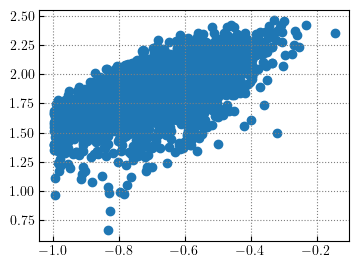

In [7]:
plt.scatter(logsig_chis_inj,Neffs_inj)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/113992580.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_66990/113992580.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["$10$","$10^{2}$"])


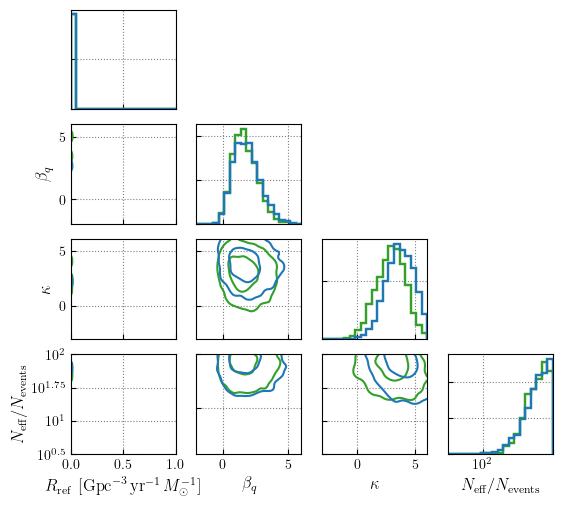

In [8]:
fig = plt.figure(figsize=(14*(4./9.),13*(4./9.)))

bqs_inj = inj_samps.bq.values
Rs_inj = inj_samps.R20.values
kappas_inj = inj_samps.kappa.values
Neffs_inj = np.log10(inj_samps.nEff_inj_per_event.values)

bqs_nn = nn_samps.bq.values
Rs_nn = nn_samps.R20.values
kappas_nn = nn_samps.kappa.values
Neffs_nn = np.log10(nn_samps.nEff_inj_per_event.values)

bq_min,bq_max = -2,6
R_min,R_max = 0,1
kappa_min,kappa_max = -3,6
Neff_min,Neff_max = 0.5,2

###########
# COLUMN 1
###########

ax = fig.add_subplot(4,4,1)
ax.hist(Rs_inj,density=True,histtype='step',bins=np.linspace(R_min,R_max,20),color=cnsbh,lw=1.75)
ax.hist(Rs_nn,density=True,histtype='step',bins=np.linspace(R_min,R_max,20),color=cbbh,lw=1.75)
ax.set_xlim(R_min,R_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(4,4,5)
plot_contour_data(ax,Rs_inj,bqs_inj,R_min,R_max,bq_min,bq_max,cnsbh)
plot_contour_data(ax,Rs_nn,bqs_nn,R_min,R_max,bq_min,bq_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\beta_q$")

ax = fig.add_subplot(4,4,9)
plot_contour_data(ax,Rs_inj,kappas_inj,R_min,R_max,kappa_min,kappa_max,cnsbh)
plot_contour_data(ax,Rs_nn,kappas_nn,R_min,R_max,kappa_min,kappa_max,cbbh)
ax.set_xticklabels([])
ax.set_ylabel(r"$\kappa$")

ax = fig.add_subplot(4,4,13)
plot_contour_data(ax,Rs_inj,Neffs_inj,R_min,R_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,Rs_nn,Neffs_nn,R_min,R_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels(["$10^{0.5}$","$10^{1}$","$10^{1.75}$","$10^{2}$"])
ax.set_xlabel(r"$R_\mathrm{ref}$ [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,M_\odot^{-1}$]")
ax.set_ylabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")

###########
# COLUMN 2
###########

ax = fig.add_subplot(4,4,6)
ax.hist(bqs_inj,density=True,histtype='step',bins=np.linspace(bq_min,bq_max,20),color=cnsbh,lw=1.75)
ax.hist(bqs_nn,density=True,histtype='step',bins=np.linspace(bq_min,bq_max,20),color=cbbh,lw=1.75)
ax.set_xlim(bq_min,bq_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(4,4,10)
plot_contour_data(ax,bqs_inj,kappas_inj,bq_min,bq_max,kappa_min,kappa_max,cnsbh)
plot_contour_data(ax,bqs_nn,kappas_nn,bq_min,bq_max,kappa_min,kappa_max,cbbh)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(4,4,14)
plot_contour_data(ax,bqs_inj,Neffs_inj,bq_min,bq_max,sig_cost_min,Neff_max,cnsbh)
plot_contour_data(ax,bqs_nn,Neffs_nn,bq_min,bq_max,sig_cost_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\beta_q$")

###########
# COLUMN 3
###########

ax = fig.add_subplot(4,4,11)
ax.hist(kappas_inj,density=True,histtype='step',bins=np.linspace(kappa_min,kappa_max,20),color=cnsbh,lw=1.75)
ax.hist(kappas_nn,density=True,histtype='step',bins=np.linspace(kappa_min,kappa_max,20),color=cbbh,lw=1.75)
ax.set_xlim(kappa_min,kappa_max)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(4,4,15)
plot_contour_data(ax,kappas_inj,Neffs_inj,kappa_min,kappa_max,Neff_min,Neff_max,cnsbh)
plot_contour_data(ax,kappas_nn,Neffs_nn,kappa_min,kappa_max,Neff_min,Neff_max,cbbh)
ax.set_yticklabels([])
ax.set_xlabel(r"$\kappa$")

###########
# COLUMN 4
###########

ax = fig.add_subplot(4,4,16)
ax.hist(Neffs_inj,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cnsbh,lw=1.75)
ax.hist(Neffs_nn,density=True,histtype='step',bins=np.linspace(Neff_min,Neff_max,20),color=cbbh,lw=1.75)
ax.set_xlim(Neff_min,Neff_max)
ax.set_yticklabels([])
ax.set_xticklabels(["$10$","$10^{2}$"])
ax.set_xlabel(r"$N_\mathrm{eff}/N_\mathrm{events}$")


plt.subplots_adjust(wspace=0.2,hspace=0.15)
plt.savefig('figure_12.pdf',bbox_inches='tight',dpi=400)
plt.show()